In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from torchvision.utils import make_grid
import os
from typing import List
from tqdm.notebook import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


In [2]:
import matplotlib.pyplot as plt

def visualize_class_distribution(class_samples_dict):
    """
    Visualizes the number of samples per class using a bar chart.

    Parameters:
    class_samples_dict (dict): A dictionary where keys are class names and values are the number of samples.

    Example:
    class_samples_dict = {'Class A': 100, 'Class B': 150, 'Class C': 75}
    visualize_class_distribution(class_samples_dict)
    """
    classes = list(class_samples_dict.keys())
    samples = list(class_samples_dict.values())

    plt.figure(figsize=(10, 6))
    plt.bar(classes, samples, color='skyblue')
    plt.xlabel('Class Name')
    plt.ylabel('Number of Samples')
    plt.title('Number of Samples per Class')
    plt.xticks(rotation=45, ha='right')
    plt.show()


In [3]:

def show_counts(train_dir: str) -> None:
    class_counts = {}
    total_count = 0 
    for class_name in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_name)
        
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_name] = num_images
            total_count += num_images
    class_weights = {}
    sum_of_weights = 0
    for class_name, count in class_counts.items():
        print(f"Class '{class_name}' contains {count} images.")
        class_weights[class_name] = total_count / count
        sum_of_weights += total_count / count
    class_weights_norm = {class_name: weight / sum_of_weights for class_name, weight in class_weights.items()}
    
    return class_weights, class_weights_norm, class_counts


In [4]:
dataset_dir = "/kaggle/input/teeth-classification/archive(1)/Teeth_Dataset"

In [5]:
train_class_weights, train_class_weights_norm, train_class_counts = show_counts(f"{dataset_dir}/Training")

Class 'OC' contains 324 images.
Class 'CaS' contains 480 images.
Class 'OT' contains 393 images.
Class 'CoS' contains 450 images.
Class 'Gum' contains 360 images.
Class 'MC' contains 540 images.
Class 'OLP' contains 540 images.


In [6]:
train_class_weights

{'OC': 9.527777777777779,
 'CaS': 6.43125,
 'OT': 7.854961832061068,
 'CoS': 6.86,
 'Gum': 8.575,
 'MC': 5.716666666666667,
 'OLP': 5.716666666666667}

In [7]:
train_class_weights_norm

{'OC': 0.18799015563001817,
 'CaS': 0.12689335505026225,
 'OT': 0.15498425044306838,
 'CoS': 0.13535291205361308,
 'Gum': 0.16919114006701633,
 'MC': 0.11279409337801088,
 'OLP': 0.11279409337801088}

In [8]:
train_class_counts

{'OC': 324,
 'CaS': 480,
 'OT': 393,
 'CoS': 450,
 'Gum': 360,
 'MC': 540,
 'OLP': 540}

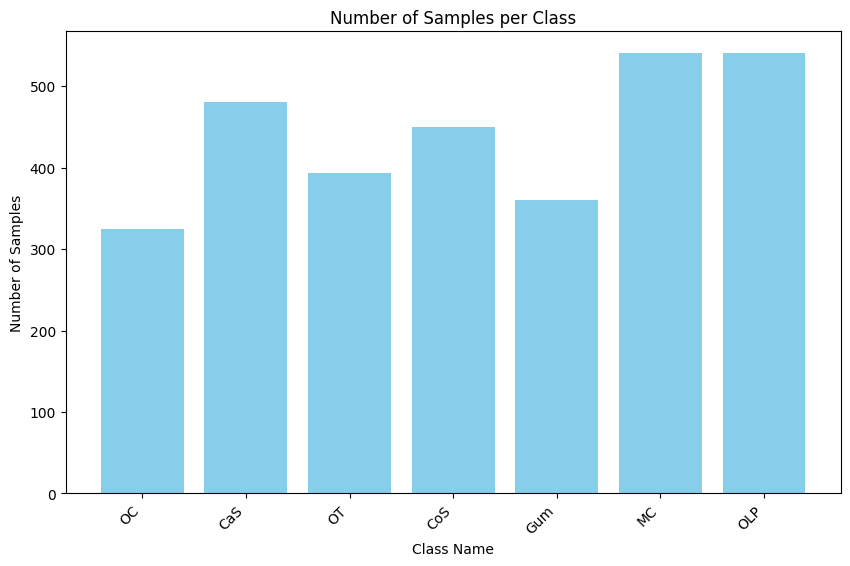

In [9]:
visualize_class_distribution(train_class_counts)

In [10]:
val_class_weights, val_class_weights_norm, val_class_counts = show_counts(f"{dataset_dir}/Validation")

Class 'OC' contains 108 images.
Class 'CaS' contains 160 images.
Class 'OT' contains 131 images.
Class 'CoS' contains 149 images.
Class 'Gum' contains 120 images.
Class 'MC' contains 180 images.
Class 'OLP' contains 180 images.


In [11]:
val_class_weights

{'OC': 9.518518518518519,
 'CaS': 6.425,
 'OT': 7.847328244274809,
 'CoS': 6.899328859060403,
 'Gum': 8.566666666666666,
 'MC': 5.711111111111111,
 'OLP': 5.711111111111111}

In [12]:
val_class_weights_norm

{'OC': 0.1878195387071686,
 'CaS': 0.1267781886273388,
 'OT': 0.1548435891631619,
 'CoS': 0.13613765221727658,
 'Gum': 0.16903758483645173,
 'MC': 0.11269172322430117,
 'OLP': 0.11269172322430117}

In [13]:
val_class_counts

{'OC': 108,
 'CaS': 160,
 'OT': 131,
 'CoS': 149,
 'Gum': 120,
 'MC': 180,
 'OLP': 180}

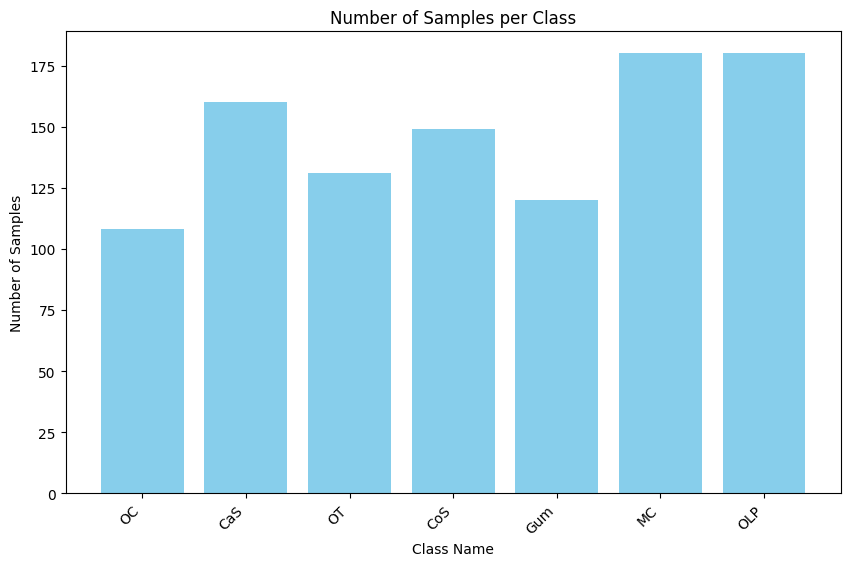

In [14]:
visualize_class_distribution(val_class_counts)

In [15]:
test_class_weights, test_class_weights_norm, test_class_counts = show_counts(f"{dataset_dir}/Testing")

Class 'OC' contains 108 images.
Class 'CaS' contains 160 images.
Class 'OT' contains 131 images.
Class 'CoS' contains 149 images.
Class 'Gum' contains 120 images.
Class 'MC' contains 180 images.
Class 'OLP' contains 180 images.


In [16]:
test_class_weights

{'OC': 9.518518518518519,
 'CaS': 6.425,
 'OT': 7.847328244274809,
 'CoS': 6.899328859060403,
 'Gum': 8.566666666666666,
 'MC': 5.711111111111111,
 'OLP': 5.711111111111111}

In [17]:
test_class_weights_norm

{'OC': 0.1878195387071686,
 'CaS': 0.1267781886273388,
 'OT': 0.1548435891631619,
 'CoS': 0.13613765221727658,
 'Gum': 0.16903758483645173,
 'MC': 0.11269172322430117,
 'OLP': 0.11269172322430117}

In [18]:
test_class_counts

{'OC': 108,
 'CaS': 160,
 'OT': 131,
 'CoS': 149,
 'Gum': 120,
 'MC': 180,
 'OLP': 180}

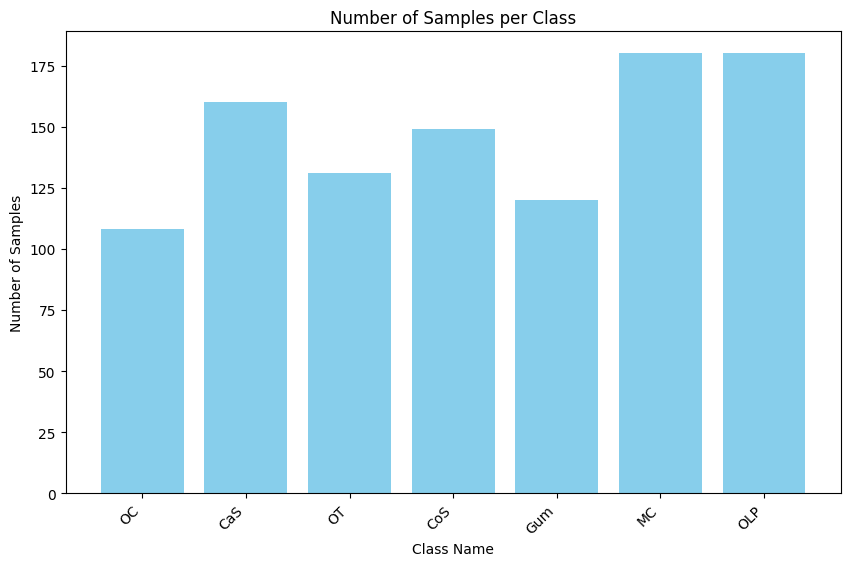

In [19]:
visualize_class_distribution(test_class_counts)

In [20]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def visualize_images_from_folders(root_dir, num_images=3):
    """
    Visualizes a few images from each folder in the specified root directory.

    Parameters:
    root_dir (str): The root directory containing subfolders of images (e.g., 'training').
    num_images (int): The number of images to visualize from each folder.

    """
    # Ensure the directory exists
    if not os.path.exists(root_dir):
        print(f"Directory {root_dir} does not exist.")
        return
    
    # Iterate over each folder in the root directory
    for folder_name in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, folder_name)
        if os.path.isdir(folder_path):
            print(f"Visualizing images from folder: {folder_name}")

            # Get a list of image files in the folder
            image_files = [f for f in os.listdir(folder_path) if f.endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
            
            # Limit to the specified number of images
            image_files = image_files[:num_images]

            # Create a subplot for the images
            fig, axes = plt.subplots(1, len(image_files), figsize=(15, 5))
            fig.suptitle(f"Images from class: {folder_name}", fontsize=16)
            
            # Display each image
            for idx, image_file in enumerate(image_files):
                image_path = os.path.join(folder_path, image_file)
                image = Image.open(image_path)
                ax = axes[idx]
                ax.imshow(image)
                ax.set_title(image_file)
                ax.axis('off')

            plt.show()
        print("--------------------------------------------------------")
        print("--------------------------------------------------------")
        print("--------------------------------------------------------")


Visualizing images from folder: OC


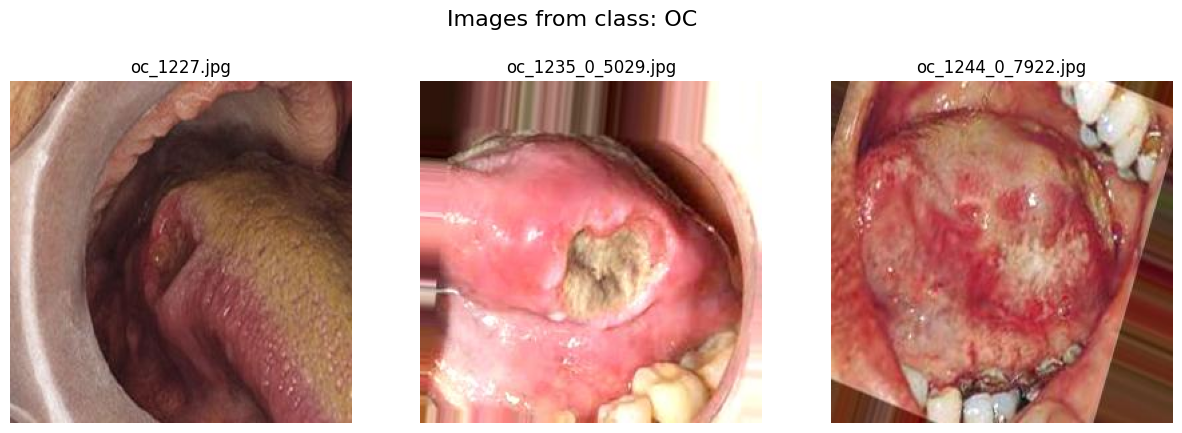

--------------------------------------------------------
--------------------------------------------------------
--------------------------------------------------------
Visualizing images from folder: CaS


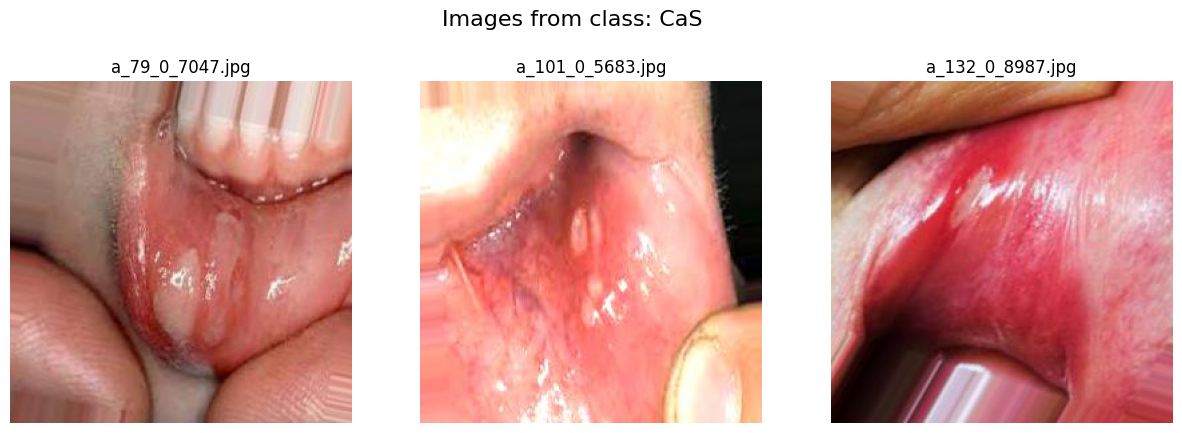

--------------------------------------------------------
--------------------------------------------------------
--------------------------------------------------------
Visualizing images from folder: OT


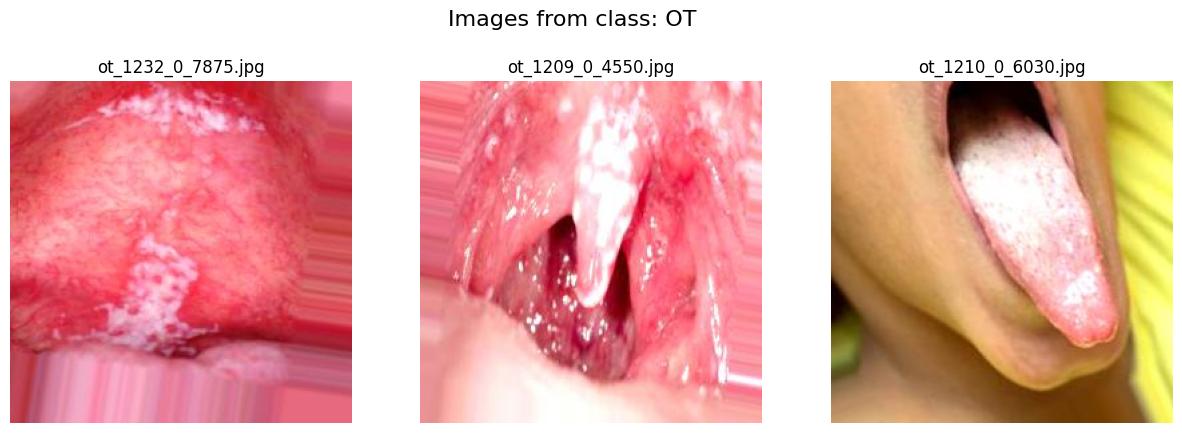

--------------------------------------------------------
--------------------------------------------------------
--------------------------------------------------------
Visualizing images from folder: CoS


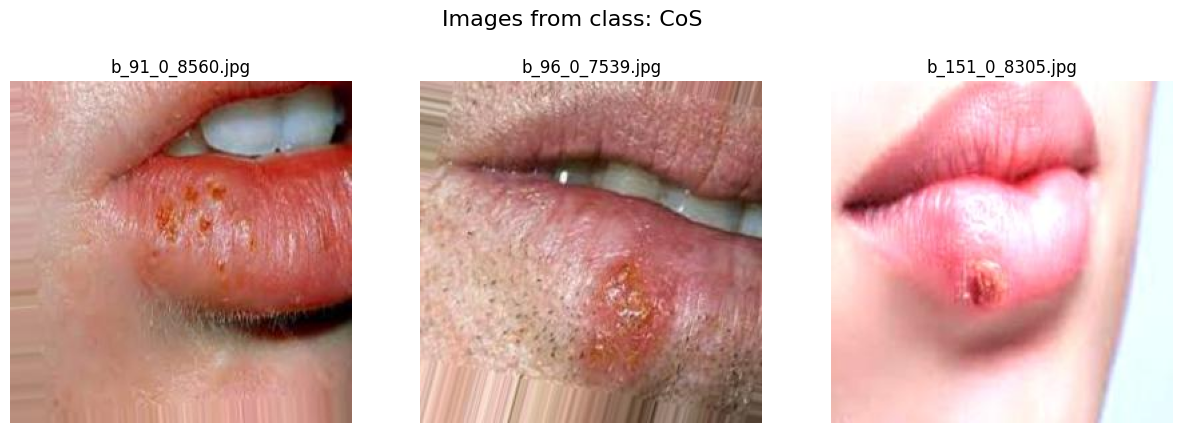

--------------------------------------------------------
--------------------------------------------------------
--------------------------------------------------------
Visualizing images from folder: Gum


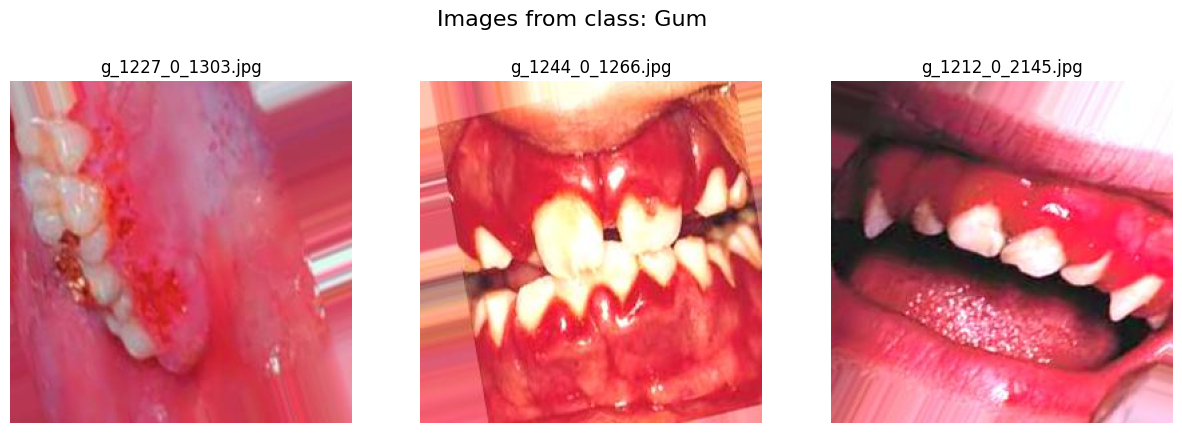

--------------------------------------------------------
--------------------------------------------------------
--------------------------------------------------------
Visualizing images from folder: MC


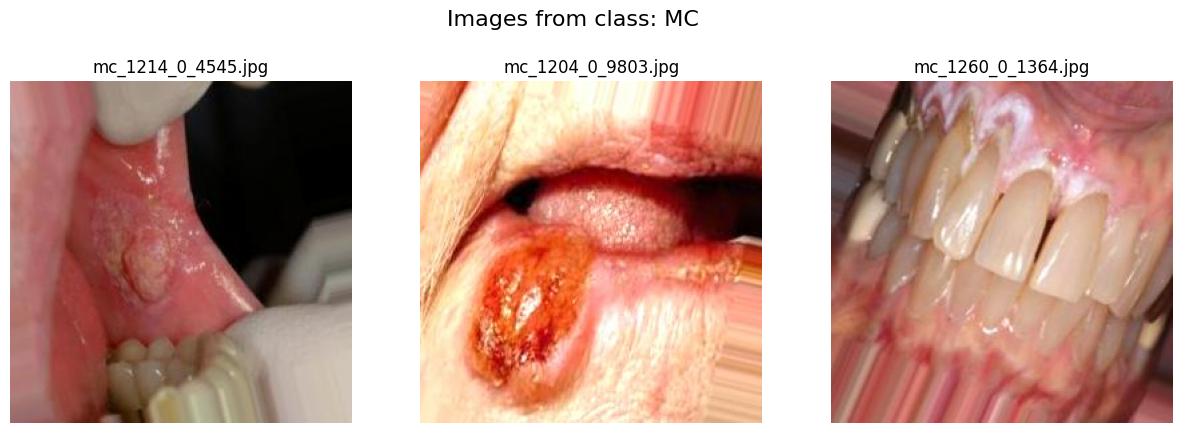

--------------------------------------------------------
--------------------------------------------------------
--------------------------------------------------------
Visualizing images from folder: OLP


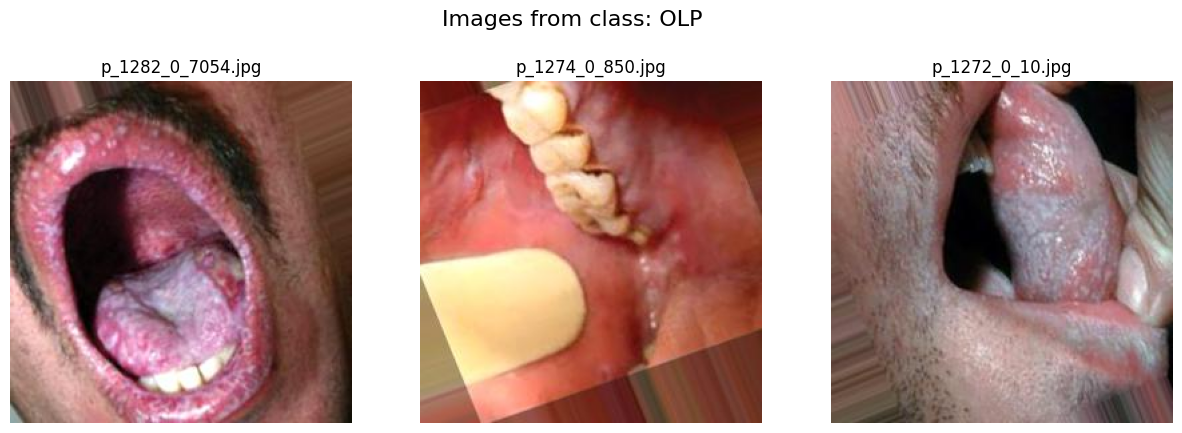

--------------------------------------------------------
--------------------------------------------------------
--------------------------------------------------------


In [21]:
visualize_images_from_folders(f'{dataset_dir}/Training', num_images=3)


In [22]:
im_target_shape = (224, 224)
train_transform = transforms.Compose([
    transforms.Resize(im_target_shape),
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomRotation(10),      # Randomly rotate the image by up to 10 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_transform = transforms.Compose([
    transforms.Resize(im_target_shape),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
train_dataset = ImageFolder(root=f'{dataset_dir}/Training', transform=train_transform)
val_dataset = ImageFolder(root=f'{dataset_dir}/Validation', transform=test_transform)
test_dataset = ImageFolder(root=f'{dataset_dir}/Testing', transform=test_transform)

batch_size = 16
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)


In [23]:
len(train_dataset), len(val_dataset), len(test_dataset)

(3087, 1028, 1028)

In [24]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 3087
    Root location: /kaggle/input/teeth-classification/archive(1)/Teeth_Dataset/Training
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.2, 0.2))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

torch.Size([3, 224, 224]) 0


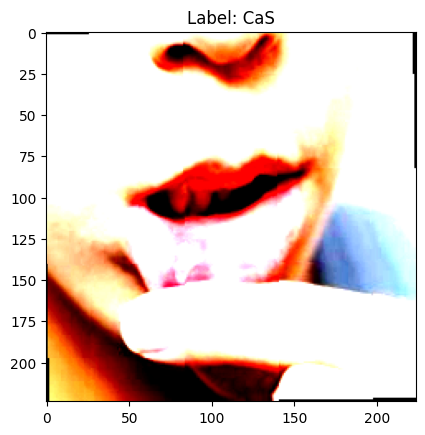

torch.Size([3, 224, 224]) 0


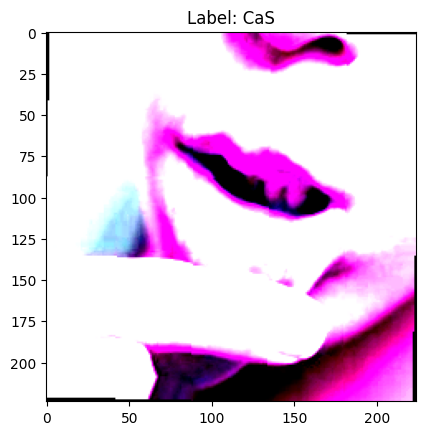

torch.Size([3, 224, 224]) 0


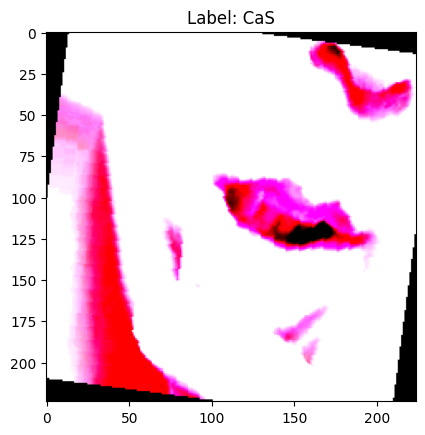

torch.Size([3, 224, 224]) 0


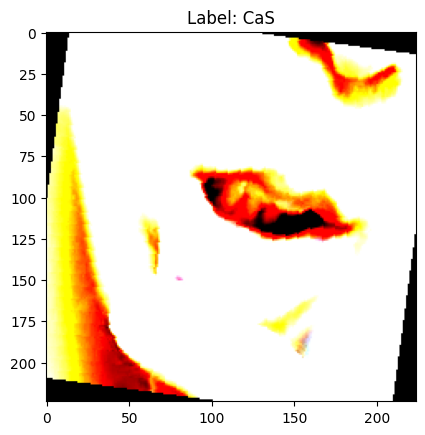

torch.Size([3, 224, 224]) 0


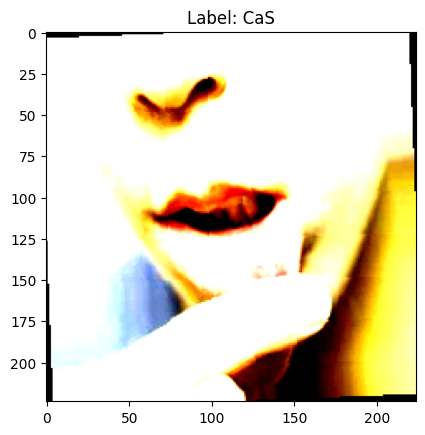

In [25]:
i = 0
for image, label in train_dataset:
    print(image.shape, label)
#     plt.imshow(images.permute(1, 2, 0))
    img = image.permute(1,2,0)
    plt.imshow(img)
    plt.title(f"Label: {train_dataset.classes[label]}")
    plt.show()
    if i==4:
        break
    i+=1

In [26]:
# Example of iterating over the training data
for images, labels in train_loader:
    # Your training code here
    print(images.shape, labels.shape)
    break

torch.Size([16, 3, 224, 224]) torch.Size([16])


# Visualizations

In [27]:
def unnormalize(img: torch.Tensor, mean: List[float], std: List[float]):
    unnorm_img = img.clone()  # Clone the image tensor to avoid modifying the original
    for t, m, s in zip(unnorm_img, mean, std):
        t.mul_(s).add_(m)  # Unnormalize each channel separately
    return unnorm_img

def imshow(img: torch.Tensor):
    unnorm_img = unnormalize(img, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    npimg = unnorm_img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


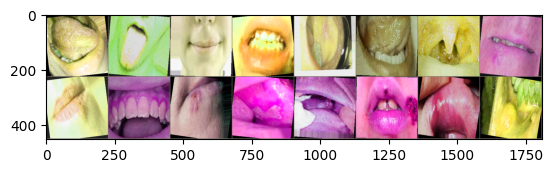

In [28]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(make_grid(images))


In [29]:
num_classes = len(train_dataset.classes)
num_classes

7

In [30]:
class_names = train_dataset.classes
class_names

['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']

# Model

## Basic Model

In [31]:
class Block(torch.nn.Module):
    def __init__(self,in_channels: int, out_channels: int, kernel_size: int, padding: int, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.conv = torch.nn.Conv2d(kernel_size=kernel_size, padding=padding, in_channels=in_channels, out_channels=out_channels)
        self.bn = torch.nn.BatchNorm2d(num_features=out_channels)
        self.relu = torch.nn.ReLU()
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        x = self.pool(x)
        return x



class TeethModel(torch.nn.Module):
    def __init__(self, num_classes: int, im_shape: tuple, res_block_kwargs: dict, num_res_blocks: int = 5) -> None:
        super(TeethModel, self).__init__()
        res_list = nn.ModuleList()
        for i in range(num_res_blocks):
            if i==0:
                res_list.append(Block(**res_block_kwargs))
            else:
                res_list.append(Block(in_channels=res_block_kwargs['out_channels'], out_channels=res_block_kwargs['out_channels'], kernel_size=res_block_kwargs['kernel_size'], padding=res_block_kwargs['padding']))
        self.resnet_blocks = torch.nn.Sequential(*res_list)
        linear_input_shape = im_shape[0] * im_shape[1] * res_block_kwargs['out_channels']
        self.linear = torch.nn.LazyLinear(out_features=num_classes)
        
    def forward(self, x):
        x = self.resnet_blocks(x)
        x = x.view(x.size(0), -1)
        x = self.linear(x)
        return x

In [32]:
def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = 100 * (y_true == y_pred).sum() / len(y_true)
    return accuracy, precision, recall, f1

In [33]:
def evaluate(dataloader, model, criterion, device=None, is_testing=False):
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    else:
        device = torch.device(device)

    model = model.to(device)
    model.eval()
    running_loss = 0.0
    all_labels = []
    all_predictions = []

    with torch.no_grad():  
        for inputs, labels in tqdm(dataloader):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()

            predicted = torch.argmax(outputs, axis=-1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # Calculate average loss
    avg_loss = running_loss / len(dataloader)

    # Calculate evaluation metrics
    accuracy, precision, recall, f1 = calculate_metrics(np.array(all_labels), np.array(all_predictions))
    
    if is_testing:
        conf_matrix = confusion_matrix(all_labels, all_predictions)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()
    
    return avg_loss, accuracy, precision, recall, f1


In [34]:
import torch

class SaveBestModel:
    def __init__(self, best_val_loss=float('inf'), save_path='best_model.pth'):
        self.best_val_loss = best_val_loss
        self.save_path = save_path

    def __call__(self, model, current_val_loss):
        if current_val_loss < self.best_val_loss:
            self.best_val_loss = current_val_loss
            torch.save(model.state_dict(), self.save_path)
            print(f'Best model saved with Val Loss: {self.best_val_loss:.4f}')


def train(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device=None, start_epoch=0, scheduler=None, new_lr=None):
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    model = model.to(device)
    save_best_model = SaveBestModel()
    if new_lr is not None:
        for param_group in optimizer.param_groups:
            param_group['lr'] = new_lr
    
    for epoch in range(start_epoch, num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        all_labels = []
        all_predictions = []

        for inputs, labels in tqdm(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            predicted = torch.argmax(outputs, dim=1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

        avg_train_loss = running_loss / len(train_loader)

        train_accuracy, train_precision, train_recall, train_f1 = calculate_metrics(np.array(all_labels), np.array(all_predictions))
        print(f'Train Loss: {avg_train_loss:.4f}, Accuracy: {train_accuracy:.2f}%, '
              f'Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}')

        # Validation phase
        avg_val_loss, val_accuracy, val_precision, val_recall, val_f1 = evaluate(val_loader, model, criterion)

        print(f'Val Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.2f}%, '
              f'Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f}')
        print("-"*50)

        # Save the best model using the callback
        save_best_model(model, avg_val_loss)

        # Step the scheduler if it exists
        if scheduler is not None:
            scheduler.step(avg_val_loss if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau) else None)


In [35]:
# Number of epochs
res_block_kwargs = {
    'in_channels': 3,
    'out_channels': 256,
    'kernel_size': 3,
    'padding': 1
}
model = TeethModel(num_classes=num_classes, res_block_kwargs=res_block_kwargs, im_shape=im_target_shape, num_res_blocks=3)
num_epochs = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_class_weights_norm_tensor = torch.tensor(list(train_class_weights_norm.values())).to(device)
criterion = nn.CrossEntropyLoss(weight=train_class_weights_norm_tensor)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [36]:
train(model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs)

Epoch 1/1
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 21.2715, Accuracy: 18.72%, Precision: 0.1910, Recall: 0.1872, F1 Score: 0.1881


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 17.2812, Accuracy: 19.16%, Precision: 0.3057, Recall: 0.1916, F1 Score: 0.0881
--------------------------------------------------
Best model saved with Val Loss: 17.2812


In [37]:
torch.save(model, 'base_teeth_model.pth')

In [38]:
loss, acc, precision, recall, f1 = evaluate(test_loader, model, criterion, device='cuda')

  0%|          | 0/65 [00:00<?, ?it/s]

In [39]:
loss, acc, precision, recall, f1

(16.921349850990563,
 18.48249027237354,
 0.22582377626497907,
 0.18482490272373542,
 0.08450547036725656)

## VGG

In [40]:
class VGGBlock(nn.Module):
    def __init__(self, in_channels: int, out_channels: int, num_convs: int):
        super(VGGBlock, self).__init__()
        layers = []
        for _ in range(num_convs):
            layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
            layers.append(nn.ReLU(inplace=True))
            in_channels = out_channels
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        self.block = nn.Sequential(*layers)

    def forward(self, x):
        return self.block(x)
    


class VGG(nn.Module):
    def __init__(self, block_configs, num_classes=1000, init_weights=True):
        super(VGG, self).__init__()
        self.features = self._make_layers(block_configs)
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

    def _make_layers(self, block_configs):
        layers = []
        in_channels = 3
        for out_channels, num_convs in block_configs:
            layers.append(VGGBlock(in_channels, out_channels, num_convs))
            in_channels = out_channels
        return nn.Sequential(*layers)

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

vgg_configs = {
    'VGG11': [(64, 1), (128, 1), (256, 2), (512, 2), (512, 2)],
    'VGG13': [(64, 2), (128, 2), (256, 2), (512, 2), (512, 2)],
    'VGG16': [(64, 2), (128, 2), (256, 3), (512, 3), (512, 3)],
    'VGG19': [(64, 2), (128, 2), (256, 4), (512, 4), (512, 4)],
}

In [41]:
vgg_model = VGG(vgg_configs['VGG11'], num_classes=num_classes, init_weights=True)
num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_class_weights_norm_tensor = torch.tensor(list(train_class_weights_norm.values())).to(device)
criterion = nn.CrossEntropyLoss(weight=train_class_weights_norm_tensor)
optimizer = torch.optim.Adam(vgg_model.parameters(), lr=0.001)

In [42]:
device

device(type='cuda')

In [43]:
train(vgg_model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs)

Epoch 1/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 2.3387, Accuracy: 15.58%, Precision: 0.1402, Recall: 0.1558, F1 Score: 0.0514


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Loss: 1.9525, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Best model saved with Val Loss: 1.9525
Epoch 2/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9277, Accuracy: 15.74%, Precision: 0.0512, Recall: 0.1574, F1 Score: 0.0620


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9534, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Epoch 3/20
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9268, Accuracy: 15.61%, Precision: 0.0512, Recall: 0.1561, F1 Score: 0.0433


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Loss: 1.9481, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Best model saved with Val Loss: 1.9481
Epoch 4/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9270, Accuracy: 15.45%, Precision: 0.0448, Recall: 0.1545, F1 Score: 0.0517


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Loss: 1.9424, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Best model saved with Val Loss: 1.9424
Epoch 5/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9268, Accuracy: 15.55%, Precision: 0.0242, Recall: 0.1555, F1 Score: 0.0418


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9469, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Epoch 6/20
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9266, Accuracy: 15.55%, Precision: 0.0242, Recall: 0.1555, F1 Score: 0.0418


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9473, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Epoch 7/20
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9261, Accuracy: 15.55%, Precision: 0.0242, Recall: 0.1555, F1 Score: 0.0418


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9496, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Epoch 8/20
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9257, Accuracy: 15.55%, Precision: 0.0242, Recall: 0.1555, F1 Score: 0.0418


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9466, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Epoch 9/20
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9254, Accuracy: 15.55%, Precision: 0.0242, Recall: 0.1555, F1 Score: 0.0418


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9492, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Epoch 10/20
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9262, Accuracy: 15.52%, Precision: 0.0491, Recall: 0.1552, F1 Score: 0.0424


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9463, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Epoch 11/20
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9256, Accuracy: 15.55%, Precision: 0.0242, Recall: 0.1555, F1 Score: 0.0418


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9488, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Epoch 12/20
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9258, Accuracy: 15.55%, Precision: 0.0242, Recall: 0.1555, F1 Score: 0.0418


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9434, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Epoch 13/20
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9251, Accuracy: 15.55%, Precision: 0.0242, Recall: 0.1555, F1 Score: 0.0418


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9492, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Epoch 14/20
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9251, Accuracy: 15.55%, Precision: 0.0242, Recall: 0.1555, F1 Score: 0.0418


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9483, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Epoch 15/20
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9262, Accuracy: 15.55%, Precision: 0.0242, Recall: 0.1555, F1 Score: 0.0418


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9501, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Epoch 16/20
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9248, Accuracy: 15.55%, Precision: 0.0242, Recall: 0.1555, F1 Score: 0.0418


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9473, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Epoch 17/20
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9263, Accuracy: 15.55%, Precision: 0.0242, Recall: 0.1555, F1 Score: 0.0418


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9487, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Epoch 18/20
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9249, Accuracy: 15.55%, Precision: 0.0242, Recall: 0.1555, F1 Score: 0.0418


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9486, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Epoch 19/20
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9259, Accuracy: 15.55%, Precision: 0.0242, Recall: 0.1555, F1 Score: 0.0418


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9471, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------
Epoch 20/20
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9253, Accuracy: 15.55%, Precision: 0.0242, Recall: 0.1555, F1 Score: 0.0418


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9493, Accuracy: 15.56%, Precision: 0.0242, Recall: 0.1556, F1 Score: 0.0419
--------------------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Resnet

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BasicBlock(nn.Module):
    expansion = 1  # No expansion in the basic block

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = F.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = F.relu(out)

        return out


In [45]:
class ResNet(nn.Module):
    def __init__(self, block: BasicBlock, layers: list, num_classes: int):
        super(ResNet, self).__init__()
        self.in_channels = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels * block.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * block.expansion),
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x


In [46]:
def resnet18(num_classes):
    return ResNet(BasicBlock, [2, 2, 2, 2], num_classes)

def resnet34(num_classes):
    return ResNet(BasicBlock, [3, 4, 6, 3], num_classes)


### Resnet 34

In [47]:
resnet34_model = resnet34(num_classes)
num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_class_weights_norm_tensor = torch.tensor(list(train_class_weights_norm.values())).to(device)
criterion = nn.CrossEntropyLoss(weight=train_class_weights_norm_tensor)
optimizer = torch.optim.Adam(resnet34_model.parameters(), lr=0.001)

In [48]:
train(resnet34_model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs)

Epoch 1/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9991, Accuracy: 18.53%, Precision: 0.1814, Recall: 0.1853, F1 Score: 0.1653


  0%|          | 0/65 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Val Loss: 1.8785, Accuracy: 26.46%, Precision: 0.2039, Recall: 0.2646, F1 Score: 0.1877
--------------------------------------------------
Best model saved with Val Loss: 1.8785
Epoch 2/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9290, Accuracy: 19.18%, Precision: 0.1921, Recall: 0.1918, F1 Score: 0.1737


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.8917, Accuracy: 19.94%, Precision: 0.1312, Recall: 0.1994, F1 Score: 0.1200
--------------------------------------------------
Epoch 3/20
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.8767, Accuracy: 21.87%, Precision: 0.2257, Recall: 0.2187, F1 Score: 0.2022


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.9441, Accuracy: 26.75%, Precision: 0.2573, Recall: 0.2675, F1 Score: 0.1967
--------------------------------------------------
Epoch 4/20
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.7831, Accuracy: 27.41%, Precision: 0.2772, Recall: 0.2741, F1 Score: 0.2597


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.7483, Accuracy: 27.53%, Precision: 0.4334, Recall: 0.2753, F1 Score: 0.2429
--------------------------------------------------
Best model saved with Val Loss: 1.7483
Epoch 5/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.6899, Accuracy: 31.13%, Precision: 0.3108, Recall: 0.3113, F1 Score: 0.2981


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.7611, Accuracy: 32.49%, Precision: 0.4540, Recall: 0.3249, F1 Score: 0.2809
--------------------------------------------------
Epoch 6/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.6183, Accuracy: 35.44%, Precision: 0.3547, Recall: 0.3544, F1 Score: 0.3402


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.7078, Accuracy: 34.24%, Precision: 0.4816, Recall: 0.3424, F1 Score: 0.3296
--------------------------------------------------
Best model saved with Val Loss: 1.7078
Epoch 7/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.5704, Accuracy: 37.71%, Precision: 0.3779, Recall: 0.3771, F1 Score: 0.3619


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.5110, Accuracy: 41.15%, Precision: 0.4129, Recall: 0.4115, F1 Score: 0.3735
--------------------------------------------------
Best model saved with Val Loss: 1.5110
Epoch 8/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.4908, Accuracy: 41.85%, Precision: 0.4206, Recall: 0.4185, F1 Score: 0.4090


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.5025, Accuracy: 39.20%, Precision: 0.4897, Recall: 0.3920, F1 Score: 0.3847
--------------------------------------------------
Best model saved with Val Loss: 1.5025
Epoch 9/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.4585, Accuracy: 42.08%, Precision: 0.4252, Recall: 0.4208, F1 Score: 0.4157


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.3644, Accuracy: 47.86%, Precision: 0.4907, Recall: 0.4786, F1 Score: 0.4682
--------------------------------------------------
Best model saved with Val Loss: 1.3644
Epoch 10/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.3730, Accuracy: 46.13%, Precision: 0.4620, Recall: 0.4613, F1 Score: 0.4557


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.3063, Accuracy: 49.22%, Precision: 0.5020, Recall: 0.4922, F1 Score: 0.4927
--------------------------------------------------
Best model saved with Val Loss: 1.3063
Epoch 11/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.3537, Accuracy: 47.68%, Precision: 0.4775, Recall: 0.4768, F1 Score: 0.4728


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.3012, Accuracy: 50.10%, Precision: 0.5608, Recall: 0.5010, F1 Score: 0.5005
--------------------------------------------------
Best model saved with Val Loss: 1.3012
Epoch 12/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.2843, Accuracy: 51.05%, Precision: 0.5145, Recall: 0.5105, F1 Score: 0.5071


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.2494, Accuracy: 51.17%, Precision: 0.5368, Recall: 0.5117, F1 Score: 0.5090
--------------------------------------------------
Best model saved with Val Loss: 1.2494
Epoch 13/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.2284, Accuracy: 53.68%, Precision: 0.5370, Recall: 0.5368, F1 Score: 0.5327


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.4299, Accuracy: 46.21%, Precision: 0.5841, Recall: 0.4621, F1 Score: 0.4432
--------------------------------------------------
Epoch 14/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.1528, Accuracy: 55.62%, Precision: 0.5588, Recall: 0.5562, F1 Score: 0.5531


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.1261, Accuracy: 54.18%, Precision: 0.5698, Recall: 0.5418, F1 Score: 0.5300
--------------------------------------------------
Best model saved with Val Loss: 1.1261
Epoch 15/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.1133, Accuracy: 57.79%, Precision: 0.5813, Recall: 0.5779, F1 Score: 0.5751


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.0112, Accuracy: 60.99%, Precision: 0.6296, Recall: 0.6099, F1 Score: 0.6007
--------------------------------------------------
Best model saved with Val Loss: 1.0112
Epoch 16/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.0682, Accuracy: 59.18%, Precision: 0.5952, Recall: 0.5918, F1 Score: 0.5886


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.0775, Accuracy: 59.63%, Precision: 0.6101, Recall: 0.5963, F1 Score: 0.5851
--------------------------------------------------
Epoch 17/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.9817, Accuracy: 62.20%, Precision: 0.6211, Recall: 0.6220, F1 Score: 0.6185


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.0447, Accuracy: 61.38%, Precision: 0.6650, Recall: 0.6138, F1 Score: 0.5974
--------------------------------------------------
Epoch 18/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.9458, Accuracy: 64.85%, Precision: 0.6486, Recall: 0.6485, F1 Score: 0.6458


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.7975, Accuracy: 71.60%, Precision: 0.7313, Recall: 0.7160, F1 Score: 0.7115
--------------------------------------------------
Best model saved with Val Loss: 0.7975
Epoch 19/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.8603, Accuracy: 67.93%, Precision: 0.6811, Recall: 0.6793, F1 Score: 0.6763


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.7774, Accuracy: 72.86%, Precision: 0.7391, Recall: 0.7286, F1 Score: 0.7243
--------------------------------------------------
Best model saved with Val Loss: 0.7774
Epoch 20/20
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.8054, Accuracy: 70.07%, Precision: 0.7006, Recall: 0.7007, F1 Score: 0.6983


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.7566, Accuracy: 72.96%, Precision: 0.7325, Recall: 0.7296, F1 Score: 0.7242
--------------------------------------------------
Best model saved with Val Loss: 0.7566


In [49]:
torch.save(resnet34_model,'/kaggle/working/resnet34_model_epoch_20')

In [50]:
train(resnet34_model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs+20,start_epoch=num_epochs)

Epoch 21/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.7486, Accuracy: 72.34%, Precision: 0.7246, Recall: 0.7234, F1 Score: 0.7214


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.6989, Accuracy: 74.03%, Precision: 0.7479, Recall: 0.7403, F1 Score: 0.7371
--------------------------------------------------
Best model saved with Val Loss: 0.6989
Epoch 22/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.6760, Accuracy: 73.99%, Precision: 0.7403, Recall: 0.7399, F1 Score: 0.7381


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.6764, Accuracy: 76.26%, Precision: 0.7856, Recall: 0.7626, F1 Score: 0.7642
--------------------------------------------------
Best model saved with Val Loss: 0.6764
Epoch 23/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.6334, Accuracy: 76.06%, Precision: 0.7618, Recall: 0.7606, F1 Score: 0.7597


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.6425, Accuracy: 77.63%, Precision: 0.7965, Recall: 0.7763, F1 Score: 0.7755
--------------------------------------------------
Best model saved with Val Loss: 0.6425
Epoch 24/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.5909, Accuracy: 78.07%, Precision: 0.7793, Recall: 0.7807, F1 Score: 0.7789


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.5523, Accuracy: 81.32%, Precision: 0.8224, Recall: 0.8132, F1 Score: 0.8121
--------------------------------------------------
Best model saved with Val Loss: 0.5523
Epoch 25/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.5430, Accuracy: 80.01%, Precision: 0.8003, Recall: 0.8001, F1 Score: 0.7995


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.5039, Accuracy: 81.32%, Precision: 0.8271, Recall: 0.8132, F1 Score: 0.8131
--------------------------------------------------
Best model saved with Val Loss: 0.5039
Epoch 26/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.4799, Accuracy: 81.96%, Precision: 0.8187, Recall: 0.8196, F1 Score: 0.8186


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.5678, Accuracy: 79.57%, Precision: 0.8083, Recall: 0.7957, F1 Score: 0.7925
--------------------------------------------------
Epoch 27/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.4282, Accuracy: 84.81%, Precision: 0.8480, Recall: 0.8481, F1 Score: 0.8475


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.4773, Accuracy: 83.46%, Precision: 0.8361, Recall: 0.8346, F1 Score: 0.8332
--------------------------------------------------
Best model saved with Val Loss: 0.4773
Epoch 28/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.3914, Accuracy: 85.78%, Precision: 0.8581, Recall: 0.8578, F1 Score: 0.8573


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.3944, Accuracy: 86.19%, Precision: 0.8677, Recall: 0.8619, F1 Score: 0.8615
--------------------------------------------------
Best model saved with Val Loss: 0.3944
Epoch 29/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.3635, Accuracy: 86.59%, Precision: 0.8659, Recall: 0.8659, F1 Score: 0.8654


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.4273, Accuracy: 83.85%, Precision: 0.8449, Recall: 0.8385, F1 Score: 0.8386
--------------------------------------------------
Epoch 30/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.3185, Accuracy: 88.69%, Precision: 0.8873, Recall: 0.8869, F1 Score: 0.8868


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.6139, Accuracy: 78.89%, Precision: 0.8197, Recall: 0.7889, F1 Score: 0.7823
--------------------------------------------------
Epoch 31/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.2976, Accuracy: 88.66%, Precision: 0.8866, Recall: 0.8866, F1 Score: 0.8864


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.3548, Accuracy: 88.04%, Precision: 0.8807, Recall: 0.8804, F1 Score: 0.8797
--------------------------------------------------
Best model saved with Val Loss: 0.3548
Epoch 32/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.2908, Accuracy: 88.82%, Precision: 0.8889, Recall: 0.8882, F1 Score: 0.8882


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.4006, Accuracy: 87.26%, Precision: 0.8776, Recall: 0.8726, F1 Score: 0.8717
--------------------------------------------------
Epoch 33/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.2862, Accuracy: 90.18%, Precision: 0.9018, Recall: 0.9018, F1 Score: 0.9017


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.4754, Accuracy: 83.27%, Precision: 0.8477, Recall: 0.8327, F1 Score: 0.8316
--------------------------------------------------
Epoch 34/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.2570, Accuracy: 90.86%, Precision: 0.9087, Recall: 0.9086, F1 Score: 0.9084


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2755, Accuracy: 89.88%, Precision: 0.9049, Recall: 0.8988, F1 Score: 0.8982
--------------------------------------------------
Best model saved with Val Loss: 0.2755
Epoch 35/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.2229, Accuracy: 92.00%, Precision: 0.9201, Recall: 0.9200, F1 Score: 0.9199


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.3328, Accuracy: 88.04%, Precision: 0.8834, Recall: 0.8804, F1 Score: 0.8800
--------------------------------------------------
Epoch 36/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.2218, Accuracy: 91.93%, Precision: 0.9195, Recall: 0.9193, F1 Score: 0.9193


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.4002, Accuracy: 87.06%, Precision: 0.8796, Recall: 0.8706, F1 Score: 0.8699
--------------------------------------------------
Epoch 37/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.2089, Accuracy: 92.16%, Precision: 0.9217, Recall: 0.9216, F1 Score: 0.9215


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2738, Accuracy: 91.05%, Precision: 0.9117, Recall: 0.9105, F1 Score: 0.9105
--------------------------------------------------
Best model saved with Val Loss: 0.2738
Epoch 38/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1857, Accuracy: 93.36%, Precision: 0.9336, Recall: 0.9336, F1 Score: 0.9335


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2726, Accuracy: 90.47%, Precision: 0.9108, Recall: 0.9047, F1 Score: 0.9045
--------------------------------------------------
Best model saved with Val Loss: 0.2726
Epoch 39/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1441, Accuracy: 95.17%, Precision: 0.9517, Recall: 0.9517, F1 Score: 0.9517


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2242, Accuracy: 92.32%, Precision: 0.9259, Recall: 0.9232, F1 Score: 0.9233
--------------------------------------------------
Best model saved with Val Loss: 0.2242
Epoch 40/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1775, Accuracy: 93.81%, Precision: 0.9383, Recall: 0.9381, F1 Score: 0.9381


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2572, Accuracy: 91.44%, Precision: 0.9157, Recall: 0.9144, F1 Score: 0.9137
--------------------------------------------------


In [51]:
evaluate(test_loader, resnet34_model, criterion)

  0%|          | 0/65 [00:00<?, ?it/s]

(0.255686867213808,
 90.95330739299611,
 0.912782510037207,
 0.9095330739299611,
 0.9095331080003297)

In [52]:
torch.save(resnet34_model,'/kaggle/working/resnet34_model_epoch_40')

In [53]:
torch.save(optimizer.state_dict(), '/kaggle/working/adam_opt_40_epochs')

In [54]:
train(resnet34_model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs+40,start_epoch=num_epochs+20)

Epoch 41/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1321, Accuracy: 95.34%, Precision: 0.9534, Recall: 0.9534, F1 Score: 0.9533


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2045, Accuracy: 92.61%, Precision: 0.9272, Recall: 0.9261, F1 Score: 0.9259
--------------------------------------------------
Best model saved with Val Loss: 0.2045
Epoch 42/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1651, Accuracy: 94.53%, Precision: 0.9453, Recall: 0.9453, F1 Score: 0.9452


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1994, Accuracy: 92.41%, Precision: 0.9258, Recall: 0.9241, F1 Score: 0.9236
--------------------------------------------------
Best model saved with Val Loss: 0.1994
Epoch 43/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1720, Accuracy: 93.85%, Precision: 0.9385, Recall: 0.9385, F1 Score: 0.9384


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2479, Accuracy: 91.93%, Precision: 0.9233, Recall: 0.9193, F1 Score: 0.9195
--------------------------------------------------
Epoch 44/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1203, Accuracy: 95.50%, Precision: 0.9550, Recall: 0.9550, F1 Score: 0.9550


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.3348, Accuracy: 90.76%, Precision: 0.9221, Recall: 0.9076, F1 Score: 0.9083
--------------------------------------------------
Epoch 45/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1297, Accuracy: 95.34%, Precision: 0.9535, Recall: 0.9534, F1 Score: 0.9533


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2173, Accuracy: 93.00%, Precision: 0.9325, Recall: 0.9300, F1 Score: 0.9297
--------------------------------------------------
Epoch 46/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1335, Accuracy: 95.04%, Precision: 0.9504, Recall: 0.9504, F1 Score: 0.9504


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2072, Accuracy: 93.19%, Precision: 0.9327, Recall: 0.9319, F1 Score: 0.9318
--------------------------------------------------
Epoch 47/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1118, Accuracy: 96.21%, Precision: 0.9621, Recall: 0.9621, F1 Score: 0.9621


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2550, Accuracy: 92.61%, Precision: 0.9281, Recall: 0.9261, F1 Score: 0.9257
--------------------------------------------------
Epoch 48/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1185, Accuracy: 96.11%, Precision: 0.9612, Recall: 0.9611, F1 Score: 0.9611


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1865, Accuracy: 93.58%, Precision: 0.9371, Recall: 0.9358, F1 Score: 0.9358
--------------------------------------------------
Best model saved with Val Loss: 0.1865
Epoch 49/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1164, Accuracy: 95.66%, Precision: 0.9566, Recall: 0.9566, F1 Score: 0.9565


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2018, Accuracy: 93.48%, Precision: 0.9378, Recall: 0.9348, F1 Score: 0.9351
--------------------------------------------------
Epoch 50/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1135, Accuracy: 95.82%, Precision: 0.9582, Recall: 0.9582, F1 Score: 0.9582


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2069, Accuracy: 93.19%, Precision: 0.9343, Recall: 0.9319, F1 Score: 0.9314
--------------------------------------------------
Epoch 51/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1152, Accuracy: 95.92%, Precision: 0.9592, Recall: 0.9592, F1 Score: 0.9592


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2341, Accuracy: 93.68%, Precision: 0.9399, Recall: 0.9368, F1 Score: 0.9372
--------------------------------------------------
Epoch 52/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0972, Accuracy: 96.40%, Precision: 0.9640, Recall: 0.9640, F1 Score: 0.9640


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2114, Accuracy: 92.61%, Precision: 0.9282, Recall: 0.9261, F1 Score: 0.9257
--------------------------------------------------
Epoch 53/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1073, Accuracy: 96.11%, Precision: 0.9612, Recall: 0.9611, F1 Score: 0.9611


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2915, Accuracy: 90.86%, Precision: 0.9148, Recall: 0.9086, F1 Score: 0.9093
--------------------------------------------------
Epoch 54/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0895, Accuracy: 97.05%, Precision: 0.9705, Recall: 0.9705, F1 Score: 0.9705


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1692, Accuracy: 93.87%, Precision: 0.9396, Recall: 0.9387, F1 Score: 0.9386
--------------------------------------------------
Best model saved with Val Loss: 0.1692
Epoch 55/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1346, Accuracy: 95.66%, Precision: 0.9566, Recall: 0.9566, F1 Score: 0.9566


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2158, Accuracy: 92.22%, Precision: 0.9294, Recall: 0.9222, F1 Score: 0.9232
--------------------------------------------------
Epoch 56/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0690, Accuracy: 97.54%, Precision: 0.9754, Recall: 0.9754, F1 Score: 0.9754


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1481, Accuracy: 95.04%, Precision: 0.9508, Recall: 0.9504, F1 Score: 0.9504
--------------------------------------------------
Best model saved with Val Loss: 0.1481
Epoch 57/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0983, Accuracy: 96.79%, Precision: 0.9680, Recall: 0.9679, F1 Score: 0.9679


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2754, Accuracy: 91.83%, Precision: 0.9244, Recall: 0.9183, F1 Score: 0.9175
--------------------------------------------------
Epoch 58/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0842, Accuracy: 97.15%, Precision: 0.9715, Recall: 0.9715, F1 Score: 0.9715


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1673, Accuracy: 94.75%, Precision: 0.9484, Recall: 0.9475, F1 Score: 0.9477
--------------------------------------------------
Epoch 59/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0709, Accuracy: 97.44%, Precision: 0.9745, Recall: 0.9744, F1 Score: 0.9744


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1910, Accuracy: 94.36%, Precision: 0.9479, Recall: 0.9436, F1 Score: 0.9440
--------------------------------------------------
Epoch 60/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0631, Accuracy: 97.73%, Precision: 0.9773, Recall: 0.9773, F1 Score: 0.9773


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1119, Accuracy: 96.30%, Precision: 0.9645, Recall: 0.9630, F1 Score: 0.9631
--------------------------------------------------
Best model saved with Val Loss: 0.1119


In [55]:
evaluate(test_loader, resnet34_model, criterion)

  0%|          | 0/65 [00:00<?, ?it/s]

(0.11674798658798234,
 96.20622568093385,
 0.9627256845014064,
 0.9620622568093385,
 0.9620774609298521)

In [56]:
torch.save(resnet34_model,'/kaggle/working/resnet34_model_epoch_60')

In [57]:
torch.save(optimizer.state_dict(), '/kaggle/working/adam_opt_60_epochs')

In [58]:
loaded_resnet34_model = torch.load('/kaggle/working/resnet34_model_epoch_60')

  0%|          | 0/65 [00:00<?, ?it/s]

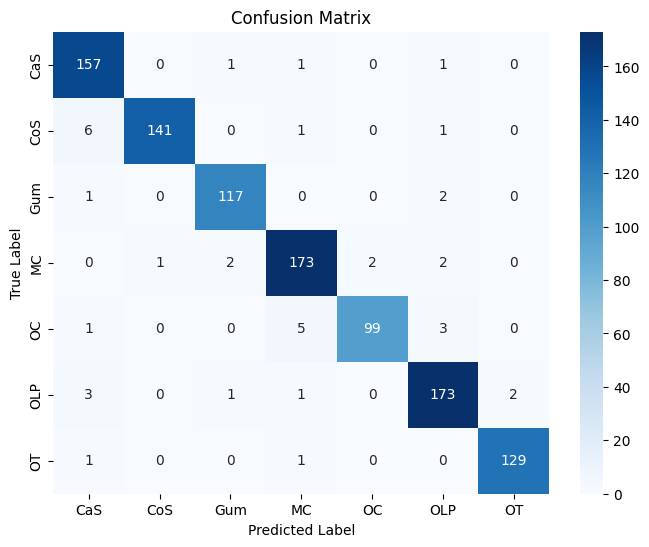

(0.11674798658798234,
 96.20622568093385,
 0.9627256845014064,
 0.9620622568093385,
 0.9620774609298521)

In [59]:
criterion = nn.CrossEntropyLoss(weight=train_class_weights_norm_tensor)
evaluate(test_loader, loaded_resnet34_model, criterion, is_testing=True)

### Resnet 18

In [60]:
resnet18_model = resnet18(num_classes)
num_epochs = 40
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_class_weights_norm_tensor = torch.tensor(list(train_class_weights_norm.values())).to(device)
criterion = nn.CrossEntropyLoss(weight=train_class_weights_norm_tensor)
optimizer = torch.optim.Adam(resnet18_model.parameters(), lr=0.001)

In [61]:
train(resnet18_model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs)

Epoch 1/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.9602, Accuracy: 20.80%, Precision: 0.1888, Recall: 0.2080, F1 Score: 0.1878


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.8637, Accuracy: 22.28%, Precision: 0.1518, Recall: 0.2228, F1 Score: 0.1678
--------------------------------------------------
Best model saved with Val Loss: 1.8637
Epoch 2/40
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.8763, Accuracy: 23.62%, Precision: 0.2253, Recall: 0.2362, F1 Score: 0.2117


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 2.0635, Accuracy: 16.93%, Precision: 0.1561, Recall: 0.1693, F1 Score: 0.1011
--------------------------------------------------
Epoch 3/40
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.7714, Accuracy: 26.27%, Precision: 0.2679, Recall: 0.2627, F1 Score: 0.2402


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 2.1559, Accuracy: 26.26%, Precision: 0.3717, Recall: 0.2626, F1 Score: 0.1918
--------------------------------------------------
Epoch 4/40
----------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.7328, Accuracy: 28.73%, Precision: 0.2800, Recall: 0.2873, F1 Score: 0.2645


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.7827, Accuracy: 30.25%, Precision: 0.3884, Recall: 0.3025, F1 Score: 0.2796
--------------------------------------------------
Best model saved with Val Loss: 1.7827
Epoch 5/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.6562, Accuracy: 32.56%, Precision: 0.3304, Recall: 0.3256, F1 Score: 0.3134


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.8270, Accuracy: 35.21%, Precision: 0.4956, Recall: 0.3521, F1 Score: 0.3181
--------------------------------------------------
Epoch 6/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.6130, Accuracy: 36.12%, Precision: 0.3706, Recall: 0.3612, F1 Score: 0.3508


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.7121, Accuracy: 39.59%, Precision: 0.5230, Recall: 0.3959, F1 Score: 0.3475
--------------------------------------------------
Best model saved with Val Loss: 1.7121
Epoch 7/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.4667, Accuracy: 41.40%, Precision: 0.4226, Recall: 0.4140, F1 Score: 0.4076


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.3914, Accuracy: 45.04%, Precision: 0.4714, Recall: 0.4504, F1 Score: 0.4215
--------------------------------------------------
Best model saved with Val Loss: 1.3914
Epoch 8/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.4062, Accuracy: 45.90%, Precision: 0.4662, Recall: 0.4590, F1 Score: 0.4551


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.3465, Accuracy: 48.54%, Precision: 0.5460, Recall: 0.4854, F1 Score: 0.4759
--------------------------------------------------
Best model saved with Val Loss: 1.3465
Epoch 9/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.3301, Accuracy: 48.79%, Precision: 0.4913, Recall: 0.4879, F1 Score: 0.4847


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.3368, Accuracy: 49.51%, Precision: 0.5502, Recall: 0.4951, F1 Score: 0.4833
--------------------------------------------------
Best model saved with Val Loss: 1.3368
Epoch 10/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.2562, Accuracy: 52.58%, Precision: 0.5331, Recall: 0.5258, F1 Score: 0.5231


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.1781, Accuracy: 57.39%, Precision: 0.6384, Recall: 0.5739, F1 Score: 0.5598
--------------------------------------------------
Best model saved with Val Loss: 1.1781
Epoch 11/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.1458, Accuracy: 56.95%, Precision: 0.5779, Recall: 0.5695, F1 Score: 0.5680


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.7157, Accuracy: 44.75%, Precision: 0.5321, Recall: 0.4475, F1 Score: 0.4104
--------------------------------------------------
Epoch 12/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.1081, Accuracy: 57.56%, Precision: 0.5820, Recall: 0.5756, F1 Score: 0.5738


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 1.1418, Accuracy: 58.17%, Precision: 0.6140, Recall: 0.5817, F1 Score: 0.5818
--------------------------------------------------
Best model saved with Val Loss: 1.1418
Epoch 13/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 1.0033, Accuracy: 62.10%, Precision: 0.6232, Recall: 0.6210, F1 Score: 0.6189


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.9221, Accuracy: 66.83%, Precision: 0.6825, Recall: 0.6683, F1 Score: 0.6619
--------------------------------------------------
Best model saved with Val Loss: 0.9221
Epoch 14/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.9195, Accuracy: 66.08%, Precision: 0.6636, Recall: 0.6608, F1 Score: 0.6597


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.9287, Accuracy: 67.12%, Precision: 0.6776, Recall: 0.6712, F1 Score: 0.6627
--------------------------------------------------
Epoch 15/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.8714, Accuracy: 67.38%, Precision: 0.6746, Recall: 0.6738, F1 Score: 0.6715


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.9703, Accuracy: 62.84%, Precision: 0.6897, Recall: 0.6284, F1 Score: 0.6234
--------------------------------------------------
Epoch 16/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.7323, Accuracy: 73.31%, Precision: 0.7349, Recall: 0.7331, F1 Score: 0.7323


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.8975, Accuracy: 67.80%, Precision: 0.7465, Recall: 0.6780, F1 Score: 0.6813
--------------------------------------------------
Best model saved with Val Loss: 0.8975
Epoch 17/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.6757, Accuracy: 73.92%, Precision: 0.7381, Recall: 0.7392, F1 Score: 0.7379


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.6685, Accuracy: 75.58%, Precision: 0.7841, Recall: 0.7558, F1 Score: 0.7490
--------------------------------------------------
Best model saved with Val Loss: 0.6685
Epoch 18/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.5930, Accuracy: 78.78%, Precision: 0.7887, Recall: 0.7878, F1 Score: 0.7872


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.6404, Accuracy: 77.33%, Precision: 0.7923, Recall: 0.7733, F1 Score: 0.7764
--------------------------------------------------
Best model saved with Val Loss: 0.6404
Epoch 19/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.5578, Accuracy: 79.20%, Precision: 0.7921, Recall: 0.7920, F1 Score: 0.7913


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.8027, Accuracy: 72.47%, Precision: 0.7593, Recall: 0.7247, F1 Score: 0.7284
--------------------------------------------------
Epoch 20/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.4667, Accuracy: 82.93%, Precision: 0.8300, Recall: 0.8293, F1 Score: 0.8289


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.5260, Accuracy: 80.64%, Precision: 0.8217, Recall: 0.8064, F1 Score: 0.8024
--------------------------------------------------
Best model saved with Val Loss: 0.5260
Epoch 21/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.4418, Accuracy: 83.28%, Precision: 0.8337, Recall: 0.8328, F1 Score: 0.8324


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.5369, Accuracy: 80.25%, Precision: 0.8271, Recall: 0.8025, F1 Score: 0.8008
--------------------------------------------------
Epoch 22/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.3701, Accuracy: 87.17%, Precision: 0.8720, Recall: 0.8717, F1 Score: 0.8715


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.4298, Accuracy: 83.85%, Precision: 0.8582, Recall: 0.8385, F1 Score: 0.8375
--------------------------------------------------
Best model saved with Val Loss: 0.4298
Epoch 23/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.3357, Accuracy: 88.05%, Precision: 0.8806, Recall: 0.8805, F1 Score: 0.8802


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.3660, Accuracy: 87.45%, Precision: 0.8793, Recall: 0.8745, F1 Score: 0.8710
--------------------------------------------------
Best model saved with Val Loss: 0.3660
Epoch 24/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.2822, Accuracy: 89.83%, Precision: 0.8983, Recall: 0.8983, F1 Score: 0.8981


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.3353, Accuracy: 87.84%, Precision: 0.8876, Recall: 0.8784, F1 Score: 0.8788
--------------------------------------------------
Best model saved with Val Loss: 0.3353
Epoch 25/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.2776, Accuracy: 89.41%, Precision: 0.8939, Recall: 0.8941, F1 Score: 0.8938


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.3232, Accuracy: 89.79%, Precision: 0.9052, Recall: 0.8979, F1 Score: 0.8987
--------------------------------------------------
Best model saved with Val Loss: 0.3232
Epoch 26/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.2748, Accuracy: 90.41%, Precision: 0.9042, Recall: 0.9041, F1 Score: 0.9040


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.3989, Accuracy: 85.80%, Precision: 0.8769, Recall: 0.8580, F1 Score: 0.8607
--------------------------------------------------
Epoch 27/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.2282, Accuracy: 91.93%, Precision: 0.9195, Recall: 0.9193, F1 Score: 0.9193


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.3436, Accuracy: 86.67%, Precision: 0.8841, Recall: 0.8667, F1 Score: 0.8589
--------------------------------------------------
Epoch 28/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1809, Accuracy: 93.88%, Precision: 0.9388, Recall: 0.9388, F1 Score: 0.9387


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2860, Accuracy: 89.30%, Precision: 0.8977, Recall: 0.8930, F1 Score: 0.8930
--------------------------------------------------
Best model saved with Val Loss: 0.2860
Epoch 29/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1788, Accuracy: 94.23%, Precision: 0.9424, Recall: 0.9423, F1 Score: 0.9423


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2065, Accuracy: 92.51%, Precision: 0.9263, Recall: 0.9251, F1 Score: 0.9253
--------------------------------------------------
Best model saved with Val Loss: 0.2065
Epoch 30/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1759, Accuracy: 93.68%, Precision: 0.9370, Recall: 0.9368, F1 Score: 0.9368


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2283, Accuracy: 91.54%, Precision: 0.9194, Recall: 0.9154, F1 Score: 0.9156
--------------------------------------------------
Epoch 31/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.2195, Accuracy: 92.16%, Precision: 0.9220, Recall: 0.9216, F1 Score: 0.9217


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2222, Accuracy: 92.41%, Precision: 0.9317, Recall: 0.9241, F1 Score: 0.9251
--------------------------------------------------
Epoch 32/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1393, Accuracy: 94.75%, Precision: 0.9476, Recall: 0.9475, F1 Score: 0.9475


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2848, Accuracy: 90.18%, Precision: 0.9077, Recall: 0.9018, F1 Score: 0.9017
--------------------------------------------------
Epoch 33/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1466, Accuracy: 95.01%, Precision: 0.9502, Recall: 0.9501, F1 Score: 0.9501


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2066, Accuracy: 92.51%, Precision: 0.9288, Recall: 0.9251, F1 Score: 0.9252
--------------------------------------------------
Epoch 34/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1525, Accuracy: 94.75%, Precision: 0.9476, Recall: 0.9475, F1 Score: 0.9475


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.3149, Accuracy: 89.20%, Precision: 0.9008, Recall: 0.8920, F1 Score: 0.8933
--------------------------------------------------
Epoch 35/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1427, Accuracy: 94.36%, Precision: 0.9437, Recall: 0.9436, F1 Score: 0.9436


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1741, Accuracy: 93.68%, Precision: 0.9376, Recall: 0.9368, F1 Score: 0.9365
--------------------------------------------------
Best model saved with Val Loss: 0.1741
Epoch 36/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1614, Accuracy: 94.46%, Precision: 0.9447, Recall: 0.9446, F1 Score: 0.9446


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1714, Accuracy: 93.97%, Precision: 0.9406, Recall: 0.9397, F1 Score: 0.9397
--------------------------------------------------
Best model saved with Val Loss: 0.1714
Epoch 37/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1055, Accuracy: 96.37%, Precision: 0.9638, Recall: 0.9637, F1 Score: 0.9637


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1943, Accuracy: 93.87%, Precision: 0.9435, Recall: 0.9387, F1 Score: 0.9395
--------------------------------------------------
Epoch 38/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1250, Accuracy: 95.89%, Precision: 0.9589, Recall: 0.9589, F1 Score: 0.9589


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1861, Accuracy: 94.07%, Precision: 0.9441, Recall: 0.9407, F1 Score: 0.9413
--------------------------------------------------
Epoch 39/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1100, Accuracy: 96.08%, Precision: 0.9610, Recall: 0.9608, F1 Score: 0.9608


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1673, Accuracy: 93.77%, Precision: 0.9390, Recall: 0.9377, F1 Score: 0.9377
--------------------------------------------------
Best model saved with Val Loss: 0.1673
Epoch 40/40
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0994, Accuracy: 96.47%, Precision: 0.9648, Recall: 0.9647, F1 Score: 0.9647


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.0803, Accuracy: 96.50%, Precision: 0.9651, Recall: 0.9650, F1 Score: 0.9650
--------------------------------------------------
Best model saved with Val Loss: 0.0803


In [62]:
avg_loss, accuracy, precision, recall, f1 = evaluate(test_loader, resnet18_model, criterion)

  0%|          | 0/65 [00:00<?, ?it/s]

In [63]:
avg_loss, accuracy, precision, recall, f1

(0.08748934742314024,
 96.59533073929961,
 0.9663044280770319,
 0.9659533073929961,
 0.9658154694900153)

In [64]:
model_save_path = '/kaggle/working/resnet18_epoch_40.pth'


In [65]:
torch.save(resnet18_model, model_save_path)

In [66]:
m = torch.load(model_save_path)

In [67]:
evaluate(test_loader, m, criterion)

  0%|          | 0/65 [00:00<?, ?it/s]

(0.08748934742314024,
 96.59533073929961,
 0.9663044280770319,
 0.9659533073929961,
 0.9658154694900153)

#### Train for 10 more epochs (40 to 60)

In [68]:
train(resnet18_model, train_loader, val_loader, criterion, optimizer, num_epochs=60, start_epoch=40)

Epoch 41/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0949, Accuracy: 96.50%, Precision: 0.9650, Recall: 0.9650, F1 Score: 0.9650


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1893, Accuracy: 92.90%, Precision: 0.9312, Recall: 0.9290, F1 Score: 0.9286
--------------------------------------------------
Best model saved with Val Loss: 0.1893
Epoch 42/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1038, Accuracy: 96.53%, Precision: 0.9654, Recall: 0.9653, F1 Score: 0.9653


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1704, Accuracy: 93.19%, Precision: 0.9386, Recall: 0.9319, F1 Score: 0.9316
--------------------------------------------------
Best model saved with Val Loss: 0.1704
Epoch 43/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0987, Accuracy: 96.57%, Precision: 0.9657, Recall: 0.9657, F1 Score: 0.9657


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1375, Accuracy: 95.04%, Precision: 0.9525, Recall: 0.9504, F1 Score: 0.9505
--------------------------------------------------
Best model saved with Val Loss: 0.1375
Epoch 44/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1099, Accuracy: 96.40%, Precision: 0.9640, Recall: 0.9640, F1 Score: 0.9640


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1740, Accuracy: 93.97%, Precision: 0.9402, Recall: 0.9397, F1 Score: 0.9396
--------------------------------------------------
Epoch 45/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1007, Accuracy: 96.63%, Precision: 0.9664, Recall: 0.9663, F1 Score: 0.9663


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1569, Accuracy: 94.84%, Precision: 0.9511, Recall: 0.9484, F1 Score: 0.9483
--------------------------------------------------
Epoch 46/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1211, Accuracy: 95.98%, Precision: 0.9598, Recall: 0.9598, F1 Score: 0.9598


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2430, Accuracy: 93.09%, Precision: 0.9375, Recall: 0.9309, F1 Score: 0.9312
--------------------------------------------------
Epoch 47/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0780, Accuracy: 97.64%, Precision: 0.9764, Recall: 0.9764, F1 Score: 0.9764


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1277, Accuracy: 95.82%, Precision: 0.9588, Recall: 0.9582, F1 Score: 0.9582
--------------------------------------------------
Best model saved with Val Loss: 0.1277
Epoch 48/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0835, Accuracy: 97.15%, Precision: 0.9715, Recall: 0.9715, F1 Score: 0.9715


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1060, Accuracy: 96.40%, Precision: 0.9650, Recall: 0.9640, F1 Score: 0.9641
--------------------------------------------------
Best model saved with Val Loss: 0.1060
Epoch 49/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0521, Accuracy: 98.12%, Precision: 0.9812, Recall: 0.9812, F1 Score: 0.9812


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.0999, Accuracy: 96.98%, Precision: 0.9702, Recall: 0.9698, F1 Score: 0.9698
--------------------------------------------------
Best model saved with Val Loss: 0.0999
Epoch 50/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0875, Accuracy: 97.25%, Precision: 0.9725, Recall: 0.9725, F1 Score: 0.9725


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2541, Accuracy: 91.73%, Precision: 0.9237, Recall: 0.9173, F1 Score: 0.9173
--------------------------------------------------
Epoch 51/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0676, Accuracy: 97.73%, Precision: 0.9774, Recall: 0.9773, F1 Score: 0.9773


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1342, Accuracy: 95.72%, Precision: 0.9594, Recall: 0.9572, F1 Score: 0.9573
--------------------------------------------------
Epoch 52/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0618, Accuracy: 98.02%, Precision: 0.9803, Recall: 0.9802, F1 Score: 0.9802


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1670, Accuracy: 93.77%, Precision: 0.9421, Recall: 0.9377, F1 Score: 0.9384
--------------------------------------------------
Epoch 53/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0831, Accuracy: 96.99%, Precision: 0.9699, Recall: 0.9699, F1 Score: 0.9699


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1290, Accuracy: 95.82%, Precision: 0.9600, Recall: 0.9582, F1 Score: 0.9585
--------------------------------------------------
Epoch 54/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0723, Accuracy: 97.47%, Precision: 0.9747, Recall: 0.9747, F1 Score: 0.9747


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1742, Accuracy: 94.46%, Precision: 0.9467, Recall: 0.9446, F1 Score: 0.9449
--------------------------------------------------
Epoch 55/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0690, Accuracy: 97.93%, Precision: 0.9793, Recall: 0.9793, F1 Score: 0.9793


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1343, Accuracy: 94.84%, Precision: 0.9492, Recall: 0.9484, F1 Score: 0.9485
--------------------------------------------------
Epoch 56/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0742, Accuracy: 97.54%, Precision: 0.9754, Recall: 0.9754, F1 Score: 0.9754


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1186, Accuracy: 95.53%, Precision: 0.9570, Recall: 0.9553, F1 Score: 0.9555
--------------------------------------------------
Epoch 57/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0672, Accuracy: 97.41%, Precision: 0.9741, Recall: 0.9741, F1 Score: 0.9741


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1847, Accuracy: 93.39%, Precision: 0.9395, Recall: 0.9339, F1 Score: 0.9351
--------------------------------------------------
Epoch 58/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.1142, Accuracy: 95.76%, Precision: 0.9576, Recall: 0.9576, F1 Score: 0.9576


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.2004, Accuracy: 93.29%, Precision: 0.9374, Recall: 0.9329, F1 Score: 0.9328
--------------------------------------------------
Epoch 59/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0618, Accuracy: 97.86%, Precision: 0.9786, Recall: 0.9786, F1 Score: 0.9786


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1658, Accuracy: 94.75%, Precision: 0.9502, Recall: 0.9475, F1 Score: 0.9479
--------------------------------------------------
Epoch 60/60
----------


  0%|          | 0/193 [00:00<?, ?it/s]

Train Loss: 0.0393, Accuracy: 98.57%, Precision: 0.9858, Recall: 0.9857, F1 Score: 0.9857


  0%|          | 0/65 [00:00<?, ?it/s]

Val Loss: 0.1039, Accuracy: 96.60%, Precision: 0.9665, Recall: 0.9660, F1 Score: 0.9661
--------------------------------------------------


  0%|          | 0/65 [00:00<?, ?it/s]

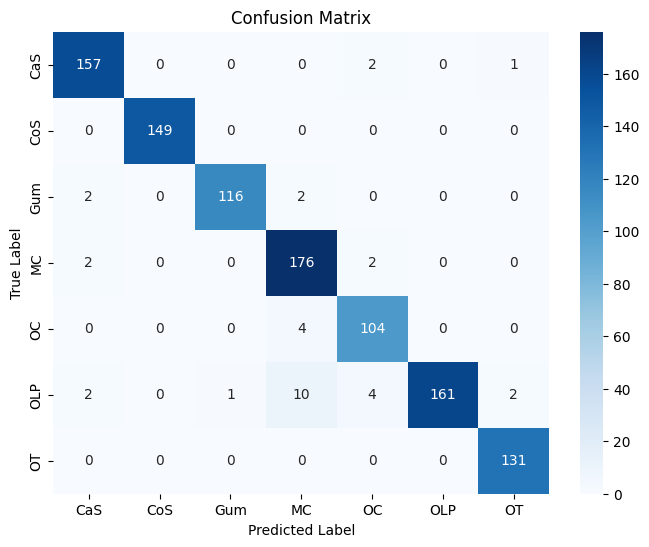

In [69]:
last_avg_test_loss, last_test_acc, last_test_prec, last_test_recall, last_test_f1 = evaluate(test_loader, resnet18_model, criterion, is_testing=True)

In [70]:
last_avg_test_loss, last_test_acc, last_test_prec, last_test_recall, last_test_f1

(0.1099010648561808,
 96.69260700389106,
 0.9683245786838819,
 0.9669260700389105,
 0.9668574681606475)

In [71]:
resnet18_best_model = resnet18(num_classes)
resnet18_best_model.load_state_dict(torch.load('/kaggle/working/best_model.pth'))

<All keys matched successfully>

  0%|          | 0/65 [00:00<?, ?it/s]

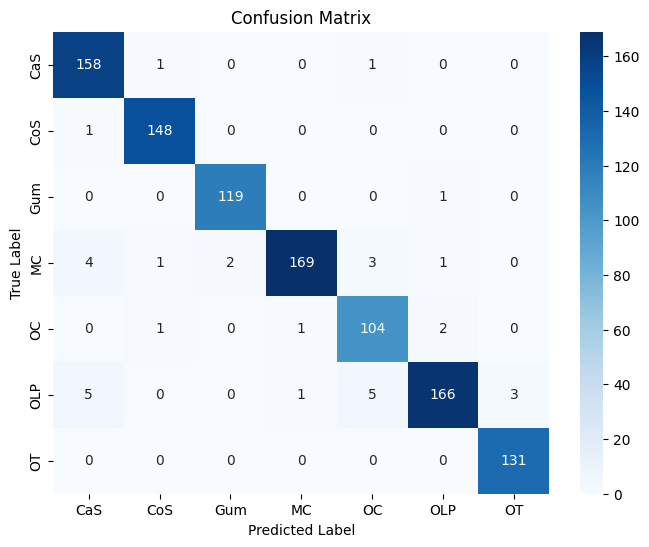

In [72]:
best_avg_test_loss, best_test_acc, best_test_prec, best_test_recall, best_test_f1 = evaluate(test_loader, resnet18_best_model, criterion, is_testing=True)

In [73]:
best_avg_test_loss, best_test_acc, best_test_prec, best_test_recall, best_test_f1

(0.11364772705800043,
 96.78988326848248,
 0.9685382212968933,
 0.9678988326848249,
 0.9678075187693905)

In [74]:
model_save_path_2 = '/kaggle/working/resnet18_epoch_60.pth'


In [75]:
torch.save(resnet18_model, model_save_path_2)

In [76]:
m_2 = torch.load(model_save_path_2)
evaluate(test_loader, m_2, criterion)

  0%|          | 0/65 [00:00<?, ?it/s]

(0.1099010648561808,
 96.69260700389106,
 0.9683245786838819,
 0.9669260700389105,
 0.9668574681606475)

In [77]:
adam_opt_path = '/kaggle/working/adam_opt_resnet18_epoch60.pth'

In [78]:
torch.save(optimizer.state_dict(), adam_opt_path)

In [79]:
# import torch.optim as optim

# # Recreate the optimizer, ensuring it matches the model's parameters
# optimizer = optim.Adam(m_3.parameters(), lr=0.001)  # Use the same optimizer and hyperparameters

# # Load the saved optimizer state
# optimizer.load_state_dict(torch.load(adam_opt_path))

In [80]:
# optimizer